## RoBERTa introduction and Credits

Twitter-roBERTa-base for Sentiment Analysis

This is a roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. This model is suitable for English (for a similar multilingual model, see XLM-T).

Reference Paper: TweetEval (Findings of EMNLP 2020).
Git Repo: Tweeteval official repository.
Labels: 0 -> Negative; 1 -> Neutral; 2 -> Positive

reference paper: https://aclanthology.org/2020.findings-emnlp.148/


the code used in this notebook as been extracted from the following repository: https://huggingface.co/blog/bert-101#7-how-to-get-started-using-bert


```
# from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)


from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)
res = []
for text in texts:
  try:
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

  # # TF
  # model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
  # model.save_pretrained(MODEL)

  # text = "Good night 😊"
  # encoded_input = tokenizer(text, return_tensors='tf')
  # output = model(encoded_input)
  # scores = output[0][0].numpy()
  # scores = softmax(scores)
    d = {"text": text}
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        d[f"{l}"] = f'{np.round(float(s),4)}'
    res.append(d)
  except:
    d = {"text": text, "labels":"NA"}
    res.append(d)

from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Emotions:
# anger, joy, sadness, and optimism​

task='emotion'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

text = "Celebrating my promotion 😎"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# # TF
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)

# text = "Celebrating my promotion 😎"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)

ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")
```

# Emotion Analysis





In [1]:


def preprocess(text):
  new_text = []
  for t in text.split(" "):
    t = 'http' if t.startswith('http') else t
    new_text.append(t)
  return " ".join(new_text)

import re
def preprocess1(text):
   cleaned_text = re.sub(r'http[s]?://\S+', '', text)
   cleaned_text_no_specials = re.sub(r'[^a-zA-Z0-9\s]', '', cleaned_text)
   return cleaned_text_no_specials


In [2]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

task='emotion'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

def truncate_doc(doc, max_len=350):
  tokens = doc.split()
  truncated_tokens = tokens[:max_len]
  truncated_doc = " ".join(truncated_tokens)
  return truncated_doc

def emotion_analysis(texts):
  mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
  with urllib.request.urlopen(mapping_link) as f:
      html = f.read().decode('utf-8').split("\n")
      csvreader = csv.reader(html, delimiter='\t')
  labels = [row[1] for row in csvreader if len(row) > 1]

  model = AutoModelForSequenceClassification.from_pretrained(MODEL)
  model.save_pretrained(MODEL)
  res = []
  for text in texts:
    try:
      encoded_input = tokenizer(text, return_tensors='pt')
      output = model(**encoded_input)
      scores = output[0][0].detach().numpy()
      scores = softmax(scores)
      d = {"text": text}
      ranking = np.argsort(scores)
      ranking = ranking[::-1]
      for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        d[f"{l}"] = f'{np.round(float(s),4)}'
      res.append(d)

    except:
      try:
        text = truncate_doc(text)
        encoded_input = tokenizer(text, return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        d = {"text": text}
        ranking = np.argsort(scores)
        ranking = ranking[::-1]
        for i in range(scores.shape[0]):
          l = labels[ranking[i]]
          s = scores[ranking[i]]
          d[f"{l}"] = f'{np.round(float(s),4)}'
        res.append(d)
      except:
        d = {"text": text, "labels":"Error length"}
        res.append(d)

  return res

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

## Depression Posts Emotion Analysis

In [3]:
#load data
import pandas as pd
df0 = pd.read_csv("depression.csv")

In [4]:
#cleaning
df0['tot_post'] = df0['title'] + ' ' + df0['text']
df0['tot_post_cleaned'] = df0.tot_post.apply(preprocess1)

In [5]:
depression_p = df0[['tot_post','tot_post_cleaned']]
depression_p.head()

,tot_post,tot_post_cleaned
0,Shout out to the particular hell that is funct...,Shout out to the particular hell that is funct...
1,If 10 years ago someone told me that in 10 yea...,If 10 years ago someone told me that in 10 yea...
2,"It’s like I died at 15, but my body just kept ...",Its like I died at 15 but my body just kept on...
3,High-functioning depression: I feel like I'm l...,Highfunctioning depression I feel like Im livi...
4,I cried in front of my family today. They ende...,I cried in front of my family today They ended...


In [6]:
texts = [t for t in depression_p['tot_post_cleaned']]
print(len(texts))

1547


In [7]:
import pandas as pd

res = emotion_analysis(texts)
emotion_depression_p = pd.DataFrame(res)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [8]:
emotion_depression_p

,text,sadness,anger,joy,optimism
0,Shout out to the particular hell that is funct...,0.9479,0.0419,0.0064,0.0038
1,If 10 years ago someone told me that in 10 yea...,0.8793,0.031,0.0251,0.0645
2,Its like I died at 15 but my body just kept on...,0.9783,0.0102,0.0067,0.0047
3,Highfunctioning depression I feel like Im livi...,0.9816,0.009,0.0049,0.0045
4,I cried in front of my family today They ended...,0.9398,0.0084,0.0254,0.0263
...,...,...,...,...,...
1542,I found a trick for tidying a very messy room ...,0.1876,0.0468,0.1211,0.6445
1543,Im 50 Ive ruined my life I hate myself I have ...,0.9247,0.0571,0.0109,0.0073
1544,I havent showered in 2 weeks and I dont know h...,0.976,0.0135,0.0053,0.0052
1545,Im depressed but I have no reason to be Im so ...,0.982,0.0095,0.0043,0.0042


In [9]:
l = emotion_depression_p[emotion_depression_p.anger.isnull()]['text'].tolist()
l #empty, good
len(l)
#emotion_depression_p = emotion_depression_p[emotion_depression_p.labels.isnull()]

0

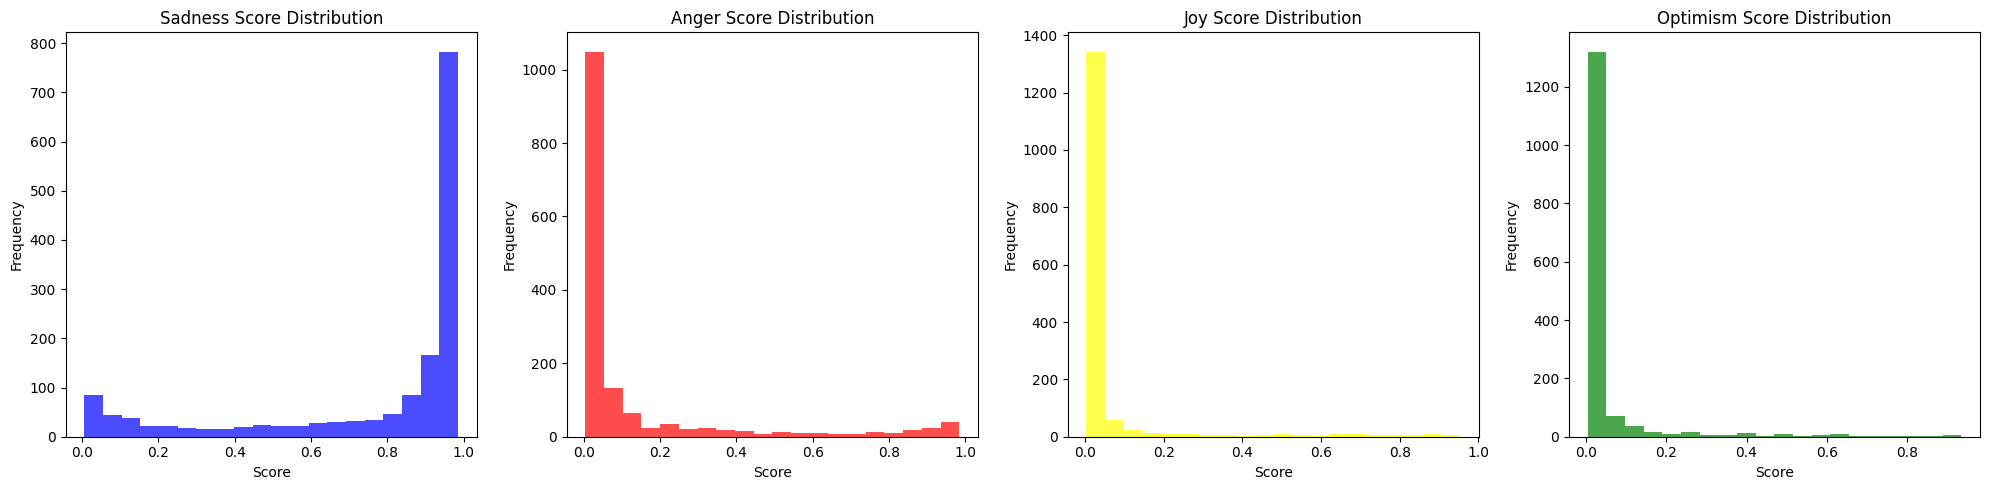

In [10]:
#change the labels
import pandas as pd
import matplotlib.pyplot as plt
data_numeric = emotion_depression_p.apply(pd.to_numeric, errors='coerce')
# Plot histograms for the sentiment scores
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.hist(data_numeric['sadness'], bins=20, color='blue', alpha=0.7)
plt.title('Sadness Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
plt.hist(data_numeric['anger'], bins=20, color='red', alpha=0.7)
plt.title('Anger Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
plt.hist(data_numeric['joy'], bins=20, color='yellow', alpha=0.7)
plt.title('Joy Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 4)
plt.hist(data_numeric['optimism'], bins=20, color='green', alpha=0.7)
plt.title('Optimism Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

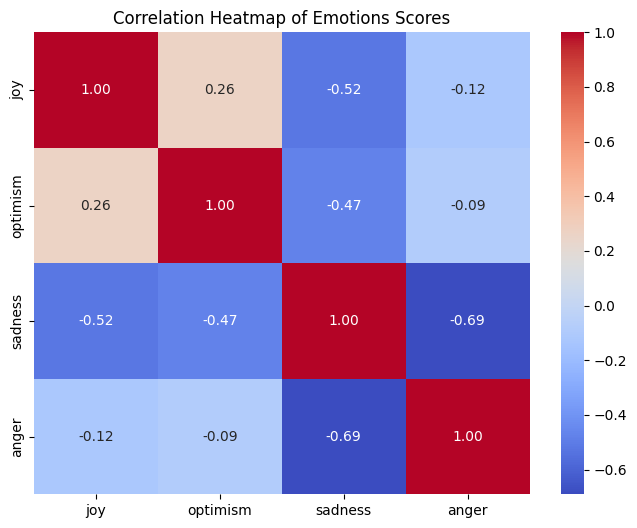

In [11]:
#to modify
import seaborn as sns
data_plot = data_numeric[['joy','optimism','sadness','anger']]
# Calculate the correlation matrix
corr = data_plot.corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Emotions Scores')
plt.show()


max
sadness     0.817065
anger       0.103426
joy         0.049774
optimism    0.029735
Name: count, dtype: float64


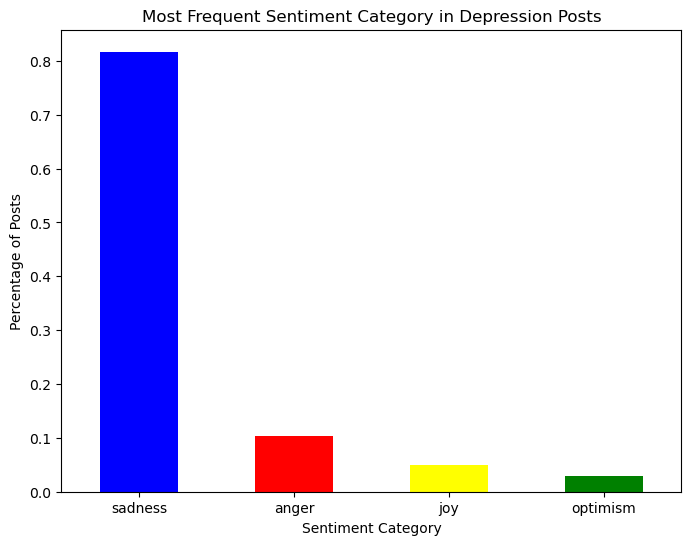

In [19]:
data_numeric['max'] = data_numeric[['joy', 'optimism', 'sadness', 'anger']].idxmax(axis=1)
max_counts = data_numeric['max'].value_counts()/len(data_numeric)
print(max_counts)

# Create a bar chart for the counts
plt.figure(figsize=(8, 6))
max_counts.plot(kind='bar', color=['blue', 'red', 'yellow', 'green'])
plt.title('Most Frequent Sentiment Category in Depression Posts')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage of Posts')
plt.xticks(rotation=0)
plt.show()

In [15]:
emotion_depression_p.to_csv("emotion_depression_p.csv")


## Anger Posts Emotion Analysis

In [16]:
#load data
import pandas as pd
df0 = pd.read_csv("anger.csv")

In [17]:
#cleaning
df0['tot_post'] = df0['title'] + ' ' + df0['text']
df0['tot_post_cleaned'] = df0.tot_post.apply(preprocess1)

In [18]:
anger_p = df0[['tot_post','tot_post_cleaned']]
anger_p.head()

,tot_post,tot_post_cleaned
0,Not a single person has upvoted anything I've ...,Not a single person has upvoted anything Ive p...
1,how am i meant to build karma if they don't le...,how am i meant to build karma if they dont let...
2,FUCK you fuck you fuck you fuck you fuck you f...,FUCK you fuck you fuck you fuck you fuck you f...
3,GO AWAY TIK TOK GRRRRR FUCK UR ADS,GO AWAY TIK TOK GRRRRR FUCK UR ADS
4,Fuck the world and fuck the monsters in it. Fu...,Fuck the world and fuck the monsters in it Fuc...


In [19]:
texts = [t for t in anger_p['tot_post_cleaned']]
print(len(texts))

1937


In [20]:
import pandas as pd

res = emotion_analysis(texts)
emotion_anger_p = pd.DataFrame(res)
emotion_anger_p

,text,anger,sadness,optimism,joy
0,Not a single person has upvoted anything Ive p...,0.979,0.012,0.0055,0.0035
1,how am i meant to build karma if they dont let...,0.9686,0.018,0.0096,0.0037
2,FUCK you fuck you fuck you fuck you fuck you f...,0.9536,0.0156,0.0069,0.0238
3,GO AWAY TIK TOK GRRRRR FUCK UR ADS,0.9737,0.011,0.0083,0.007
4,Fuck the world and fuck the monsters in it Fuc...,0.9672,0.0171,0.0105,0.0051
...,...,...,...,...,...
1932,Everything I do I rage at Everything I do extr...,0.9775,0.0104,0.0079,0.0042
1933,What should I do Everything is making me beyon...,0.9792,0.0092,0.0068,0.0048
1934,Found out the main cause for my anger I though...,0.8534,0.0832,0.0436,0.0198
1935,Is it normal to scratch yourself when angry Of...,0.9364,0.0514,0.0067,0.0055


In [21]:
l = emotion_anger_p[emotion_anger_p.anger.isnull()]['text'].tolist()
l #empty, good

[]

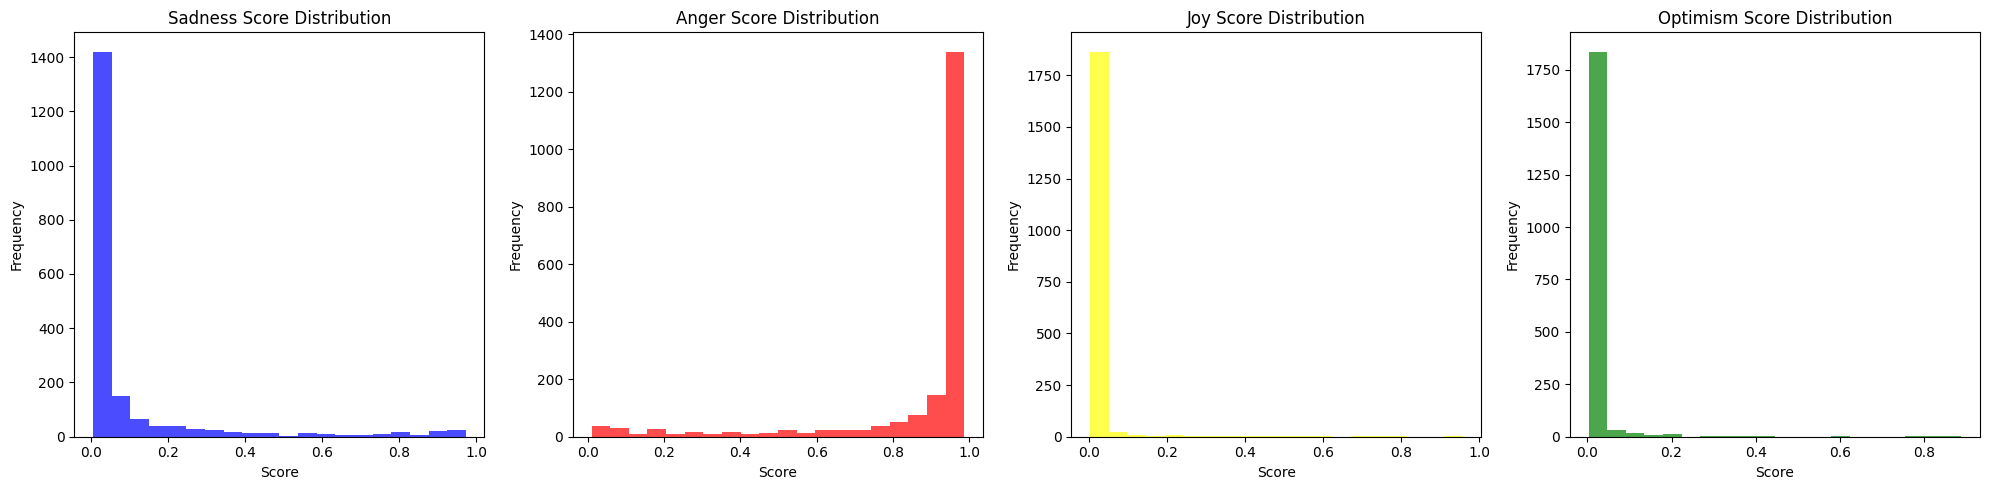

In [22]:
#change the labels
import pandas as pd
import matplotlib.pyplot as plt
data_numeric = emotion_anger_p.apply(pd.to_numeric, errors='coerce')
# Plot histograms for the sentiment scores
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.hist(data_numeric['sadness'], bins=20, color='blue', alpha=0.7)
plt.title('Sadness Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
plt.hist(data_numeric['anger'], bins=20, color='red', alpha=0.7)
plt.title('Anger Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
plt.hist(data_numeric['joy'], bins=20, color='yellow', alpha=0.7)
plt.title('Joy Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 4)
plt.hist(data_numeric['optimism'], bins=20, color='green', alpha=0.7)
plt.title('Optimism Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

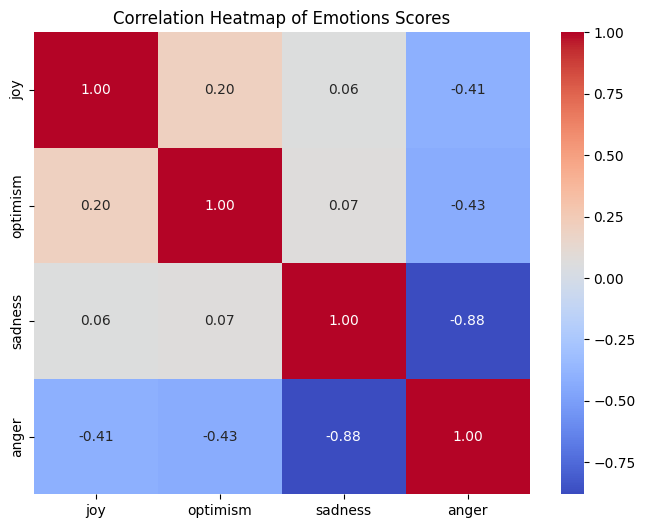

In [23]:
#to modify
import seaborn as sns
data_plot = data_numeric[['joy','optimism','sadness','anger']]
# Calculate the correlation matrix
corr = data_plot.corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Emotions Scores')
plt.show()


max
anger       0.917398
sadness     0.062468
joy         0.010325
optimism    0.009809
Name: count, dtype: float64


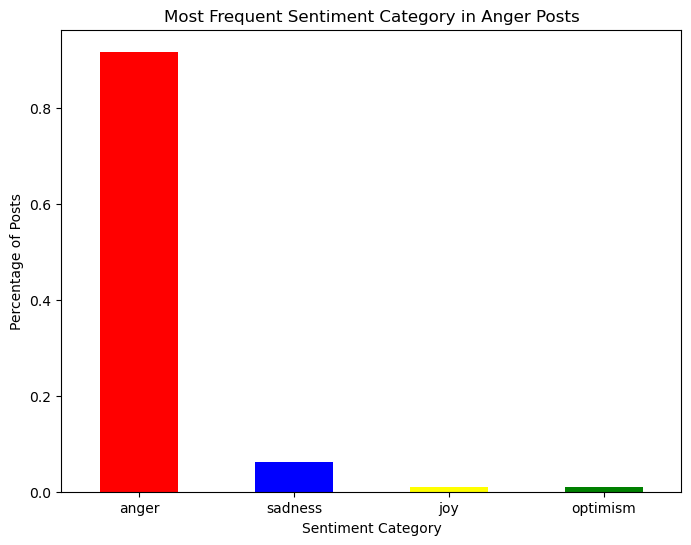

In [21]:
data_numeric['max'] = data_numeric[['joy', 'optimism', 'sadness', 'anger']].idxmax(axis=1)
max_counts = data_numeric['max'].value_counts()/len(data_numeric)
print(max_counts)

# Create a bar chart for the counts
plt.figure(figsize=(8, 6))
max_counts.plot(kind='bar', color=['red', 'blue', 'yellow', 'green'])
plt.title('Most Frequent Sentiment Category in Anger Posts')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage of Posts')
plt.xticks(rotation=0)
plt.show()

In [26]:
emotion_anger_p.to_csv("emotion_anger_p.csv")


## Anxiety Posts Emotion Analysis

In [27]:
#load data
import pandas as pd
df0 = pd.read_csv("anxiety.csv")

In [28]:
#cleaning
df0['tot_post'] = df0['title'] + ' ' + df0['text']
df0['tot_post_cleaned'] = df0.tot_post.apply(preprocess1)

In [29]:
anxiety_p = df0[['tot_post','tot_post_cleaned']]
anxiety_p.head()

,tot_post,tot_post_cleaned
0,"Professor here, if you have missed class, plea...",Professor here if you have missed class please...
1,My Uber driver had a panic attack mid-ride. He...,My Uber driver had a panic attack midride Here...
2,I was thinking why this sub has a lot more upv...,I was thinking why this sub has a lot more upv...
3,1. Anxiety makes it hard to go to sleep 2. Dep...,1 Anxiety makes it hard to go to sleep 2 Depre...
4,How to order from subway? I've been pretty muc...,How to order from subway Ive been pretty much ...


In [30]:
texts = [t for t in anxiety_p['tot_post_cleaned']]
print(len(texts))

790


In [31]:
import pandas as pd

res = emotion_analysis(texts)
emotion_anxiety_p = pd.DataFrame(res)
emotion_anxiety_p

,text,sadness,optimism,anger,joy
0,Professor here if you have missed class please...,0.4382,0.382,0.1442,0.0356
1,My Uber driver had a panic attack midride Here...,0.4016,0.1038,0.1331,0.3615
2,I was thinking why this sub has a lot more upv...,0.8409,0.022,0.0878,0.0493
3,1 Anxiety makes it hard to go to sleep 2 Depre...,0.9672,0.0069,0.0206,0.0053
4,How to order from subway Ive been pretty much ...,0.7611,0.0111,0.2106,0.0172
...,...,...,...,...,...
785,Dear people that dont have social anxiety For ...,0.9097,0.0247,0.0569,0.0087
786,Tell me you have social anxiety without tellin...,0.8071,0.0247,0.1608,0.0074
787,Was called a loser by a group of guys when exc...,0.0782,0.0172,0.8603,0.0443
788,I Like Socially Anxious People This is probabl...,0.8542,0.0707,0.0301,0.045


In [32]:
l = emotion_anxiety_p[emotion_anxiety_p.anger.isnull()]['text'].tolist()
l #empty, good

[]

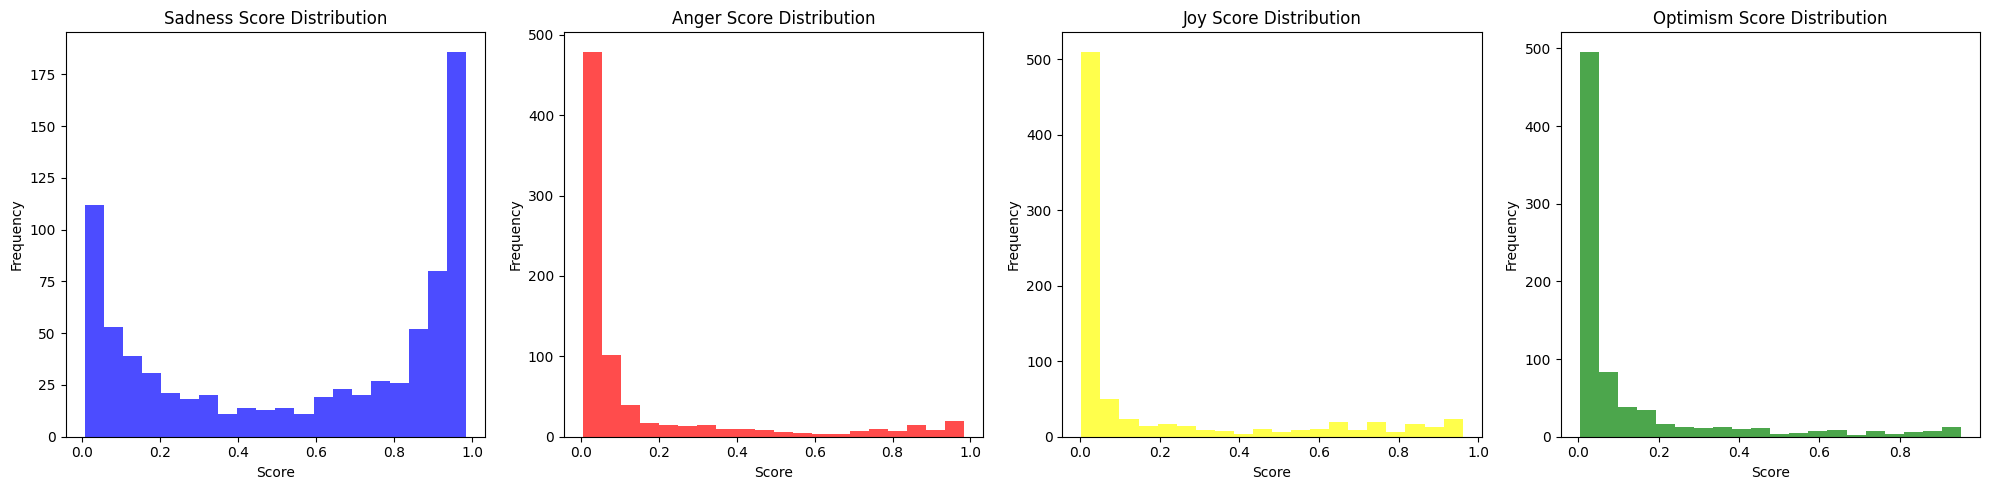

In [33]:
#change the labels
import pandas as pd
import matplotlib.pyplot as plt
data_numeric = emotion_anxiety_p.apply(pd.to_numeric, errors='coerce')
# Plot histograms for the sentiment scores
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.hist(data_numeric['sadness'], bins=20, color='blue', alpha=0.7)
plt.title('Sadness Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
plt.hist(data_numeric['anger'], bins=20, color='red', alpha=0.7)
plt.title('Anger Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
plt.hist(data_numeric['joy'], bins=20, color='yellow', alpha=0.7)
plt.title('Joy Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 4)
plt.hist(data_numeric['optimism'], bins=20, color='green', alpha=0.7)
plt.title('Optimism Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

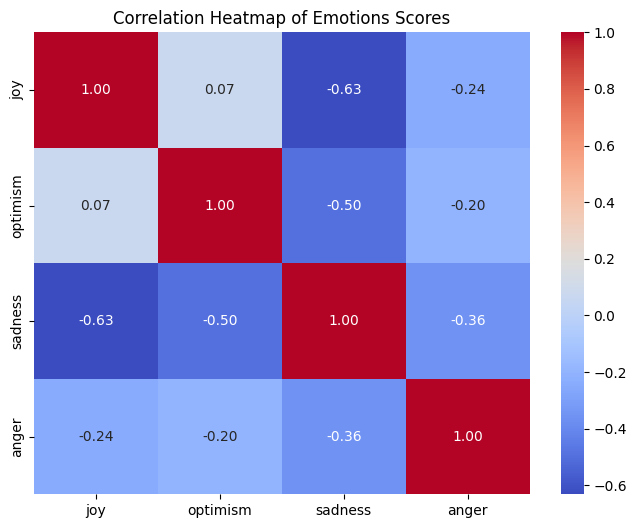

In [34]:
#to modify
import seaborn as sns
data_plot = data_numeric[['joy','optimism','sadness','anger']]
# Calculate the correlation matrix
corr = data_plot.corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Emotions Scores')
plt.show()

max
sadness     0.600000
joy         0.184810
anger       0.112658
optimism    0.102532
Name: count, dtype: float64


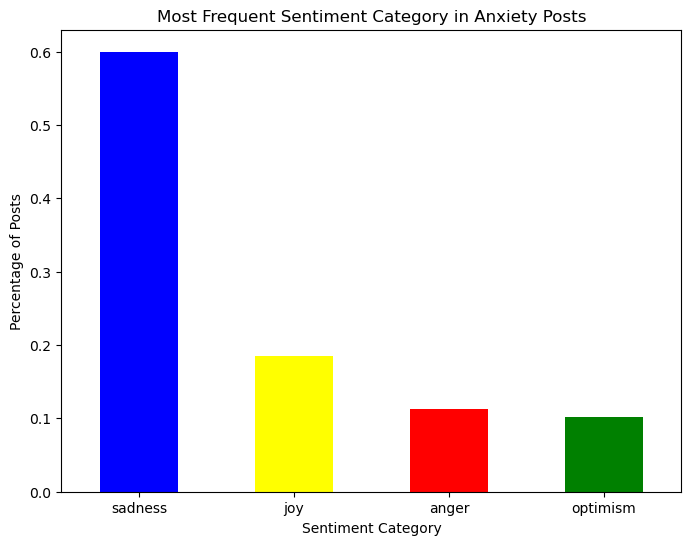

In [24]:
data_numeric['max'] = data_numeric[['joy', 'optimism', 'sadness', 'anger']].idxmax(axis=1)
max_counts = data_numeric['max'].value_counts()/len(data_numeric)
print(max_counts)


# Create a bar chart for the counts
plt.figure(figsize=(8, 6))
max_counts.plot(kind='bar', color=['blue', 'yellow', 'red', 'green'])
plt.title('Most Frequent Sentiment Category in Anxiety Posts')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage of Posts')
plt.xticks(rotation=0)
plt.show()

In [38]:
emotion_anxiety_p.to_csv("emotion_anxiety_p.csv")

## Relationships Posts Emotion Ananlysis

In [39]:
#load data
import pandas as pd
df0 = pd.read_csv("relationship.csv")

In [40]:
#cleaning
df0['tot_post'] = df0['title'] + ' ' + df0['text']
df0['tot_post_cleaned'] = df0.tot_post.apply(preprocess1)

In [41]:
rel_p = df0[['tot_post','tot_post_cleaned']]
rel_p.head()

,tot_post,tot_post_cleaned
0,To whoever needs to hear this. He made you fee...,To whoever needs to hear this He made you feel...
1,Has a toxic relationship messed my head up. I ...,Has a toxic relationship messed my head up I n...
2,Dodged a bullet I recently broke up with my bf...,Dodged a bullet I recently broke up with my bf...
3,Ex bf would make me wear his T-shirt’s over my...,Ex bf would make me wear his Tshirts over my s...
4,Looking at a toxic trait through a new lens Re...,Looking at a toxic trait through a new lens Re...


In [42]:
texts = [t for t in rel_p['tot_post_cleaned']]
print(len(texts))

890


In [43]:
import pandas as pd

res = emotion_analysis(texts)
emotion_rel_p = pd.DataFrame(res)
emotion_rel_p

,text,sadness,anger,optimism,joy
0,To whoever needs to hear this He made you feel...,0.7632,0.1855,0.0408,0.0106
1,Has a toxic relationship messed my head up I n...,0.7851,0.1215,0.0248,0.0686
2,Dodged a bullet I recently broke up with my bf...,0.0528,0.9301,0.0062,0.0109
3,Ex bf would make me wear his Tshirts over my s...,0.376,0.5829,0.028,0.0131
4,Looking at a toxic trait through a new lens Re...,0.0209,0.9584,0.0156,0.005
...,...,...,...,...,...
885,I 19F think I am in a borderline toxic relatio...,0.366,0.597,0.0174,0.0197
886,Vicious cycle of emotional abuse Things have ...,0.2033,0.7767,0.0084,0.0116
887,Toxic woman Hellojust need to get it out from ...,0.7991,0.1426,0.0211,0.0372
888,I think im being manipulated So theres this g...,0.6208,0.3102,0.0238,0.0452


In [44]:
l = emotion_rel_p[emotion_rel_p.anger.isnull()]['text'].tolist()
l #empty, good

[]

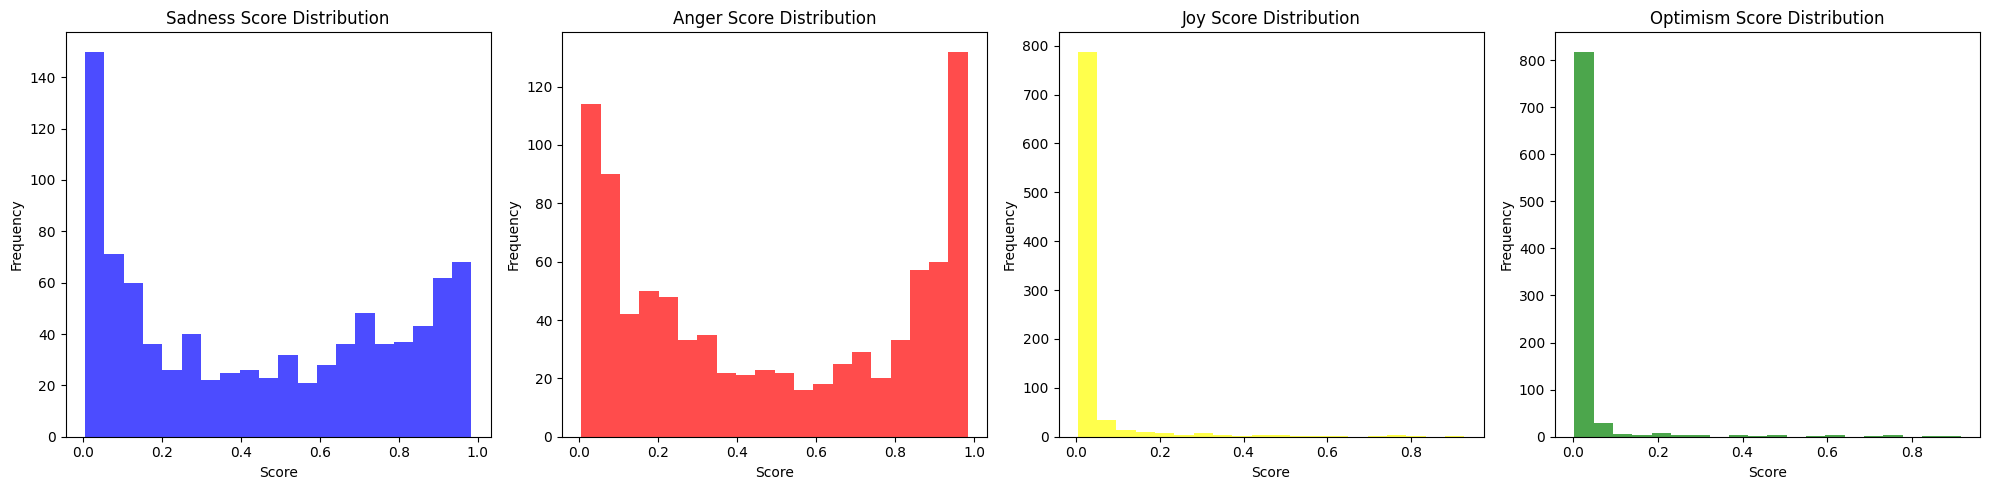

In [45]:
#change the labels
import pandas as pd
import matplotlib.pyplot as plt
data_numeric = emotion_rel_p.apply(pd.to_numeric, errors='coerce')
# Plot histograms for the sentiment scores
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.hist(data_numeric['sadness'], bins=20, color='blue', alpha=0.7)
plt.title('Sadness Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
plt.hist(data_numeric['anger'], bins=20, color='red', alpha=0.7)
plt.title('Anger Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
plt.hist(data_numeric['joy'], bins=20, color='yellow', alpha=0.7)
plt.title('Joy Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 4)
plt.hist(data_numeric['optimism'], bins=20, color='green', alpha=0.7)
plt.title('Optimism Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

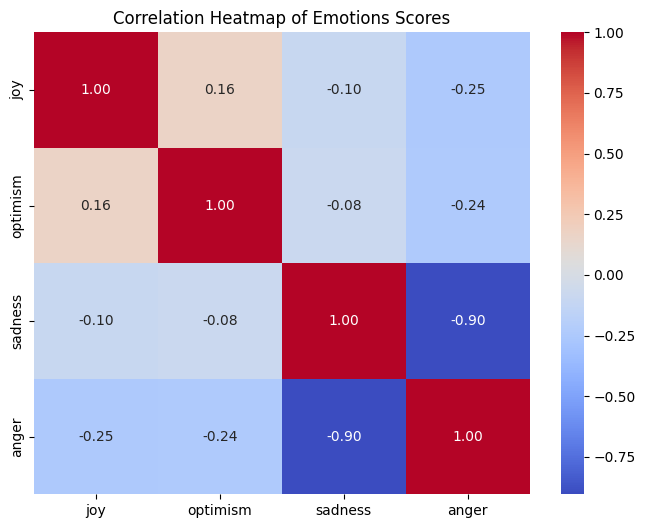

In [46]:
#to modify
import seaborn as sns
data_plot = data_numeric[['joy','optimism','sadness','anger']]
# Calculate the correlation matrix
corr = data_plot.corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Emotions Scores')
plt.show()

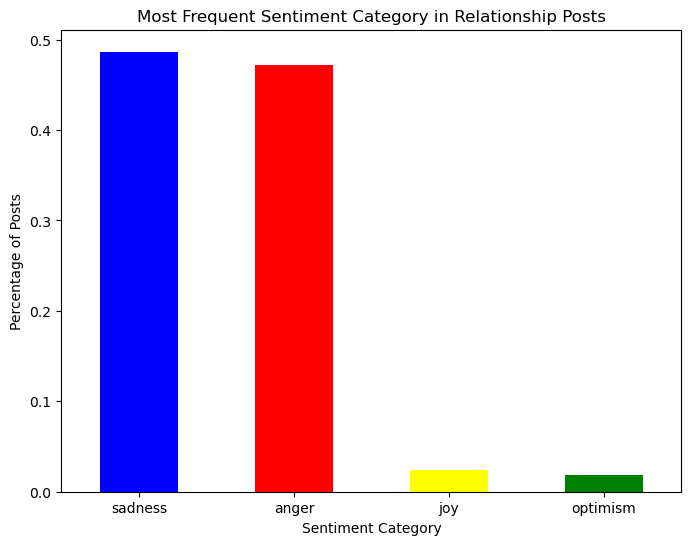

In [27]:
data_numeric['max'] = data_numeric[['joy', 'optimism', 'sadness', 'anger']].idxmax(axis=1)
max_counts = data_numeric['max'].value_counts()/len(data_numeric)

# Create a bar chart for the counts
plt.figure(figsize=(8, 6))
max_counts.plot(kind='bar', color=['blue', 'red', 'yellow', 'green'])
plt.title('Most Frequent Sentiment Category in Relationship Posts')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage of Posts')
plt.xticks(rotation=0)
plt.show()

In [50]:
emotion_rel_p.to_csv("emotion_rel_p.csv")

## Stress Posts Emotion Analysis

In [51]:
#load data
import pandas as pd
df0 = pd.read_csv("stress.csv")

In [52]:
#cleaning
df0['tot_post'] = df0['title'] + ' ' + df0['text']
df0['tot_post_cleaned'] = df0.tot_post.apply(preprocess1)

In [53]:
stress_p = df0[['tot_post','tot_post_cleaned']]
stress_p.head()

,tot_post,tot_post_cleaned
0,9 ways to lower cortisol levels and prevent st...,9 ways to lower cortisol levels and prevent st...
1,"Does anybody else stressed even if they are ""r...",Does anybody else stressed even if they are re...
2,Everything is going to be ok To anyone out the...,Everything is going to be ok To anyone out the...
3,Does anyone else feel CONSTANTLY stressed? My ...,Does anyone else feel CONSTANTLY stressed My w...
4,I feel absolutely overwhelmed I'm the boss at ...,I feel absolutely overwhelmed Im the boss at w...


In [54]:
texts = [t for t in stress_p['tot_post_cleaned']]
print(len(texts))

1675


In [55]:
import pandas as pd

res = emotion_analysis(texts)
emotion_stress_p = pd.DataFrame(res)
emotion_stress_p

,text,sadness,optimism,anger,joy
0,9 ways to lower cortisol levels and prevent st...,0.8101,0.093,0.0874,0.0095
1,Does anybody else stressed even if they are re...,0.9718,0.0052,0.0183,0.0046
2,Everything is going to be ok To anyone out the...,0.0449,0.9094,0.0237,0.0219
3,Does anyone else feel CONSTANTLY stressed My w...,0.9653,0.0086,0.0207,0.0055
4,I feel absolutely overwhelmed Im the boss at w...,0.9381,0.0091,0.0434,0.0094
...,...,...,...,...,...
1670,My Christian CEOCompany donated to Greg Abbot ...,0.1152,0.0092,0.8681,0.0075
1671,Its Sunday again In general my mental health h...,0.9681,0.0051,0.0127,0.014
1672,Do anyone elses boss or coworkers interrupt th...,0.0791,0.011,0.8981,0.0118
1673,Messed up at work today and probably will be f...,0.9129,0.0063,0.0746,0.0061


In [56]:
l = emotion_stress_p[emotion_stress_p.anger.isnull()]['text'].tolist()
l #empty, good

[]

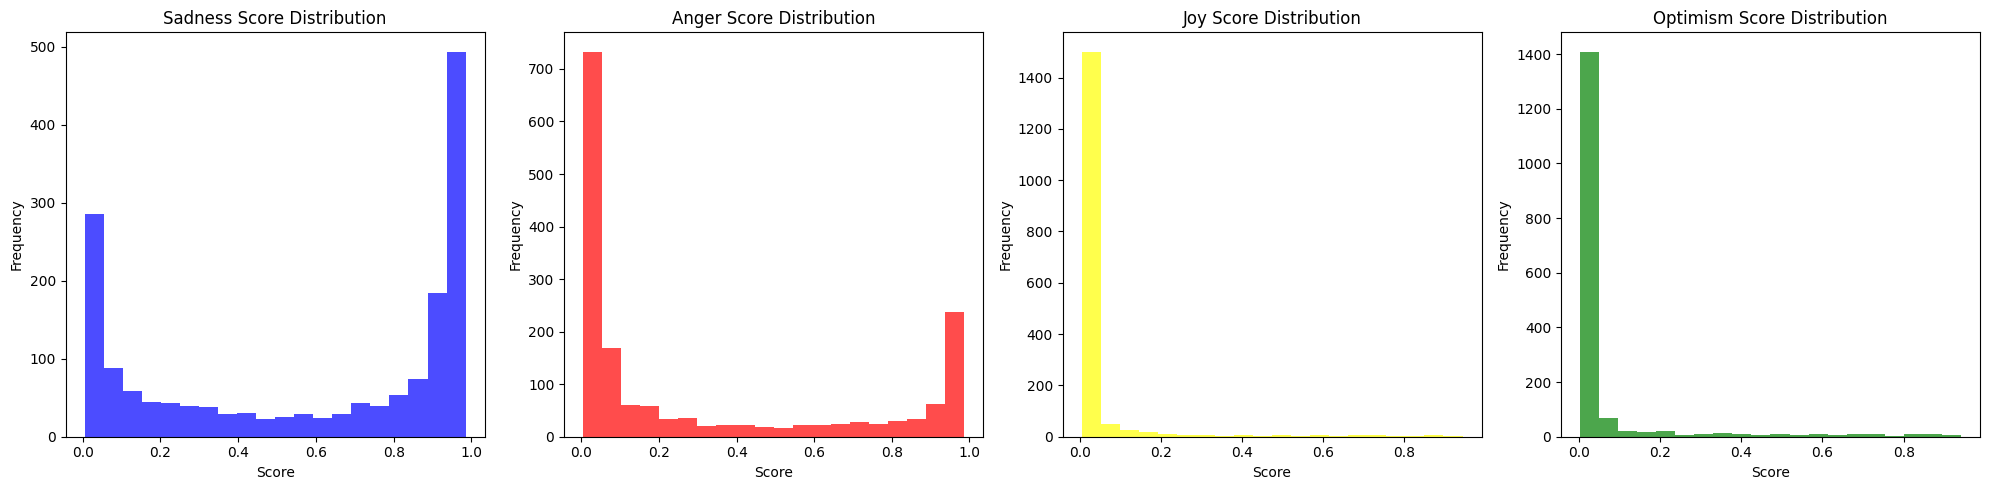

In [57]:
#change the labels
import pandas as pd
import matplotlib.pyplot as plt
data_numeric = emotion_stress_p.apply(pd.to_numeric, errors='coerce')
# Plot histograms for the sentiment scores
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.hist(data_numeric['sadness'], bins=20, color='blue', alpha=0.7)
plt.title('Sadness Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
plt.hist(data_numeric['anger'], bins=20, color='red', alpha=0.7)
plt.title('Anger Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
plt.hist(data_numeric['joy'], bins=20, color='yellow', alpha=0.7)
plt.title('Joy Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 4)
plt.hist(data_numeric['optimism'], bins=20, color='green', alpha=0.7)
plt.title('Optimism Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

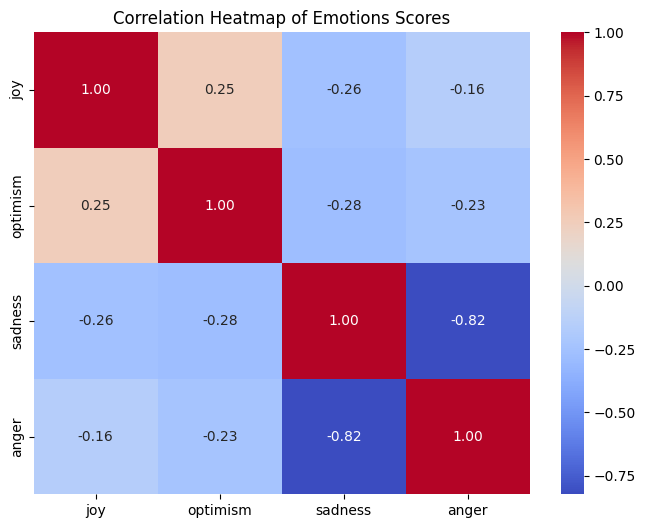

In [58]:
#to modify
import seaborn as sns
data_plot = data_numeric[['joy','optimism','sadness','anger']]
# Calculate the correlation matrix
corr = data_plot.corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Emotions Scores')
plt.show()

max
sadness     0.605970
anger       0.306269
optimism    0.060896
joy         0.026866
Name: count, dtype: float64


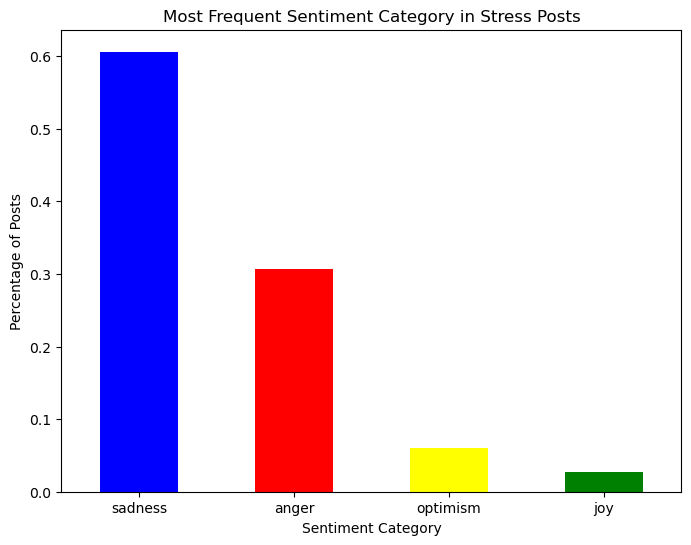

In [30]:
data_numeric['max'] = data_numeric[['joy', 'optimism', 'sadness', 'anger']].idxmax(axis=1)
max_counts = data_numeric['max'].value_counts()/len(data_numeric)
print(max_counts)

# Create a bar chart for the counts
plt.figure(figsize=(8, 6))
max_counts.plot(kind='bar', color=['blue', 'red', 'yellow', 'green'])
plt.title('Most Frequent Sentiment Category in Stress Posts')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage of Posts')
plt.xticks(rotation=0)
plt.show()

In [60]:
emotion_stress_p.to_csv("emotion_stress_p.csv")


## Emotion Analysis all files

In [ ]:
import pandas as pd
f0 = pd.read_csv("anger.csv")
f0['group'] = 'anger'
f1 = pd.read_csv("anxiety.csv")
f1['group'] = 'anxiety'
f2 = pd.read_csv("depression.csv")
f2['group'] = 'depression'
f3 = pd.read_csv("relationship.csv")
f3['group'] = 'relationship'
f4 = pd.read_csv("stress.csv")
f4['group'] = 'stress'
file_tot = pd.concat([f0, f1, f2, f3, f4], axis=0)
file_tot.head()
#print(len(f0), len(f1), len(f2), len(f3), len(f4), len(f0)+len(f1)+len(f2)+len(f3)+len(f4),len(file_tot))

In [ ]:
#cleaning
file_tot['tot_post'] = file_tot['title'] + ' ' + file_tot['text']
file_tot['tot_post_cleaned'] = file_tot.tot_post.apply(preprocess1)

In [ ]:
all_posts = file_tot[['tot_post','tot_post_cleaned']]
all_posts.head()

In [ ]:
texts = [t for t in all_posts['tot_post_cleaned']]
print(len(texts))

In [ ]:
import pandas as pd

res = emotion_analysis(texts)
emotion_all_p = pd.DataFrame(res)

In [ ]:
l = emotion_all_p[emotion_all_p.anger.isnull()]['text'].tolist()
l #empty, good
#emotion_all_p = emotion_all_p[emotion_all_p.labels.isnull()]

In [ ]:
#change the labels
import pandas as pd
import matplotlib.pyplot as plt
data_numeric = emotion_all_p.apply(pd.to_numeric, errors='coerce')
# Plot histograms for the sentiment scores
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.hist(data_numeric['sadness'], bins=20, color='blue', alpha=0.7)
plt.title('Sadness Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
plt.hist(data_numeric['anger'], bins=20, color='red', alpha=0.7)
plt.title('Anger Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
plt.hist(data_numeric['joy'], bins=20, color='yellow', alpha=0.7)
plt.title('Joy Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 4, 4)
plt.hist(data_numeric['optimism'], bins=20, color='green', alpha=0.7)
plt.title('Optimism Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
#to modify
import seaborn as sns
data_plot = data_numeric[['joy','optimism','sadness','anger']]
# Calculate the correlation matrix
corr = data_plot.corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Emotions Scores')
plt.show()

In [ ]:
data_numeric['max'] = data_numeric[['joy','optimism','sadness','anger']].idxmax(axis=1)
max_counts = data_numeric['max'].value_counts()

# Create a bar chart for the counts
plt.figure(figsize=(8, 6))
max_counts.plot(kind='bar', color=['yellow', 'green', 'blue', 'red'])
plt.title('Count of Max Emotion Categories')
plt.xlabel('Emotion Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()

In [ ]:
emotion_all_p.to_csv("emotion_all_p.csv")
